In [160]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [161]:
%matplotlib inline

The dataset I choose contains many information about college students' food choices, preference and some other personal information. I did a comprehensive analysis of the data in this dataset, such as cleaning data, classifying each feature and analyzing data distribution. Statistical analysis is the most import part of my research. I used heat map and t-test to find out the correlation between different features. I also analyzed the text content of the open-ended questions by using natural language processing technology and used SVM to classify the GPA. The problems I solved are based on certain practical problems. These analyses will play an important role in guiding students to establish good eating habits.

In [162]:
data=pd.read_csv("/Users/ouyoshimisatoshi/Desktop/(7245)Bigdata Systems and Intelligence Analytics/Assignment1/Database/food_coded.csv")

In [328]:
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [164]:
data.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,cuisine,diet_current_coded,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,108.000000,125.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,1.388889,1.760000,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,0.974759,0.766222,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,1.000000,2.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,1.000000,2.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,6.000000,4.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [165]:
data.shape

(125, 60)

<font size=6>1.Data cleaning part </font>

In [166]:
#Excluding open ended columns,textual features will be used for text analysing.
open_ended_columns = ['comfort_food','comfort_food_reasons','diet_current','eating_changes',
                      'father_profession','mother_profession','fav_cuisine','food_childhood',
                      'healthy_meal','ideal_diet','meals_dinner_friend','type_sports']
food = data.drop(open_ended_columns,axis=1)

In [167]:
food.shape

(125, 48)

<font size=4>**GPA** </font>

In [168]:
#Checking if contains any inappropraite values
#Replace all matching letters and symbols with ‘’
food['GPA'] = food['GPA'].str.replace('[a-z]|[A-Z]|\,|\'|\s','')

In [169]:
#Checking if contains any missing values
food['GPA'].isnull().value_counts()

False    123
True       2
Name: GPA, dtype: int64

In [170]:
#filling the null value with 0 to calculate the average of GPA.
food['GPA'].fillna(0,inplace=True)

In [171]:
#filling the '' value with 0 after removing inappropraite values
food['GPA'].replace(to_replace='',value=0,inplace=True)

In [172]:
#Set the data type of GPA as float
food['GPA']=food['GPA'].astype('float')

In [173]:
#Calculating the mean of GPA
gpa_mean=round(food['GPA'].mean(),3)

In [174]:
#Replacing all the 0 values with GPA's mean value
food['GPA'].replace(to_replace=0,value=gpa_mean,inplace=True)
food['GPA'].unique()

array([ 2.4  ,  3.654,  3.3  ,  3.2  ,  3.5  ,  2.25 ,  3.8  ,  3.904,
        3.4  ,  3.6  ,  3.1  ,  3.309,  4.   ,  2.2  ,  3.87 ,  3.7  ,
        3.9  ,  2.8  ,  3.   ,  3.65 ,  3.89 ,  2.9  ,  3.605,  3.83 ,
        3.292,  3.35 ,  2.6  ,  3.67 ,  3.73 ,  3.79 ,  2.71 ,  3.68 ,
        3.75 ,  3.92 ,  3.77 ,  3.63 ,  3.882])

<font size=4>**Weight** </font>

In [175]:
food['weight'] = food['weight'].str.replace('[a-z]|[A-Z]|\,|\'|\.|\s','')

In [176]:
food['weight'].fillna(0,inplace=True)
food['weight'].replace(to_replace='',value=0,inplace=True)

In [177]:
food['weight'] = food['weight'].astype('int');
weight_mean = round(food['weight'].mean())
food['weight'].replace(to_replace=0,value=weight_mean,inplace=True)
food['weight'].unique()

array([187, 155, 240, 190, 180, 137, 125, 116, 110, 264, 123, 185, 145,
       170, 135, 165, 175, 195, 105, 160, 167, 115, 205, 128, 150, 140,
       120, 100, 113, 168, 169, 200, 265, 192, 118, 210, 112, 144, 130,
       127, 129, 260, 184, 230, 138, 156])

<font size=4>Data cleaning part of numeric variables</font>


<font size=4>**calories_chicken** </font>

In [178]:
#Checking if calories_chicken column contains any missing values.And the
#result shows that there are not any null value in calores_chicken column.
food['calories_chicken'].isnull().value_counts()

False    125
Name: calories_chicken, dtype: int64

In [179]:
#Set the data type of GPA as int.
food['calories_chicken'] = food['calories_chicken'].astype('int')

<font size=4>**calories_day** </font>

In [180]:
#Checking if calories_day column contains any missing values.And the
#result shows that there are 19 null values in calores_day column.
food['calories_day'].isnull().value_counts()

False    106
True      19
Name: calories_day, dtype: int64

In [181]:
#Filling the null value with 0.
food['calories_day'].fillna(0,inplace=True)

In [182]:
#Using median of calories_day to fill the missing values
calday_median = food['calories_day'].median()

In [183]:
food['calories_day'].replace(to_replace=0,value=calday_median,inplace=True)

In [184]:
food['calories_day'] = food['calories_day'].astype('int')
food['calories_day'].value_counts()

3    82
4    23
2    20
Name: calories_day, dtype: int64

<font size=4>**calories_Scone** </font>

In [185]:
food['calories_scone'].isnull().value_counts()

False    124
True       1
Name: calories_scone, dtype: int64

In [186]:
food['calories_scone'].fillna(0,inplace=True)
c_scone_median = food['calories_scone'].median()
food['calories_scone'].replace(to_replace=0,value=c_scone_median,inplace=True)
food['calories_scone'] = food['calories_scone'].astype('int')
food['calories_scone'].value_counts()

420    80
980    23
315    22
Name: calories_scone, dtype: int64

<font size=4>**ethnic_food** </font>

In [189]:
food['ethnic_food'].isnull().value_counts()

False    125
Name: ethnic_food, dtype: int64

In [190]:
food['ethnic_food'] = food['ethnic_food'].astype('int')
food['ethnic_food'].value_counts()

5    42
4    36
3    25
2    17
1     5
Name: ethnic_food, dtype: int64

<font size=4>**fruit_day** </font>

In [191]:
food['fruit_day'].isnull().value_counts()

False    125
Name: fruit_day, dtype: int64

In [192]:
food['fruit_day'] = food['fruit_day'].astype('int')
food['fruit_day'].value_counts()

5    63
4    33
3    24
2     4
1     1
Name: fruit_day, dtype: int64

<font size=4>**greek_food** </font>

In [193]:
food['greek_food'].isnull().value_counts()

False    125
Name: greek_food, dtype: int64

In [194]:
food['greek_food'] = food['greek_food'].astype('int')
food['greek_food'].value_counts()

5    41
3    32
4    23
1    15
2    14
Name: greek_food, dtype: int64

<font size=4>**healthy_feeling** </font>

In [195]:
food['healthy_feeling'].isnull().value_counts()

False    125
Name: healthy_feeling, dtype: int64

In [196]:
food['healthy_feeling'] = food['healthy_feeling'].astype('int')
food['healthy_feeling'].value_counts()

8     17
7     16
5     15
3     15
4     13
9     12
6     12
2     12
1      8
10     5
Name: healthy_feeling, dtype: int64

<font size=4>**indian_food** </font>

In [197]:
food['indian_food'].isnull().value_counts()

False    125
Name: indian_food, dtype: int64

In [198]:
food['indian_food'] = food['indian_food'].astype('int')

In [199]:
food['indian_food'].value_counts()

5    36
3    31
1    25
2    18
4    15
Name: indian_food, dtype: int64

<font size=4>**italian_food** </font>

In [200]:
food['italian_food'].isnull().value_counts()

False    125
Name: italian_food, dtype: int64

In [201]:
food['italian_food'] = food['italian_food'].astype('int')

In [202]:
food['italian_food'].value_counts()

5    100
4     16
3      9
Name: italian_food, dtype: int64

<font size=4>**life_rewarding** </font>

In [203]:
food['life_rewarding'].isnull().value_counts()

False    124
True       1
Name: life_rewarding, dtype: int64

In [204]:
food['life_rewarding'].fillna(0,inplace=True)
lr_median = food['life_rewarding'].median()
food['life_rewarding'].replace(to_replace=0,value=lr_median,inplace=True)
food['life_rewarding'] = food['life_rewarding'].astype('int')
food['life_rewarding'].value_counts()

1     23
8     18
3     15
7     14
2     13
9     11
5     11
10    10
4      6
6      4
Name: life_rewarding, dtype: int64

<font size=4>**persian_food** </font>

In [205]:
food['persian_food'].isnull().value_counts()

False    124
True       1
Name: persian_food, dtype: int64

In [206]:
food['persian_food'].fillna(0,inplace=True)
pf_median = food['persian_food'].median()
food['persian_food'].replace(to_replace=0,value=pf_median,inplace=True)
food['persian_food'] = food['persian_food'].astype('int')
food['persian_food'].value_counts()

3    30
1    30
2    26
5    23
4    16
Name: persian_food, dtype: int64

<font size=4>**thai_food** </font>

In [207]:
food['thai_food'].isnull().value_counts()

False    125
Name: thai_food, dtype: int64

In [208]:
food['thai_food'] = food['thai_food'].astype('int')
food['thai_food'].value_counts()

5    37
3    26
4    25
1    20
2    17
Name: thai_food, dtype: int64

<font size=4>**tortilla_calories** </font>

In [209]:
food['tortilla_calories'].isnull().value_counts()

False    124
True       1
Name: tortilla_calories, dtype: int64

In [210]:
food['tortilla_calories'].fillna(0,inplace=True)
tc_median = food['tortilla_calories'].median()
food['tortilla_calories'].replace(to_replace=0,value=tc_median,inplace=True)
food['tortilla_calories'] = food['tortilla_calories'].astype('int')
food['tortilla_calories'].value_counts()

1165    46
940     44
725     22
580     13
Name: tortilla_calories, dtype: int64

<font size=4>**turkey_calories** </font>

In [211]:
food['turkey_calories'].isnull().value_counts()

False    125
Name: turkey_calories, dtype: int64

In [212]:
food['turkey_calories'] = food['turkey_calories'].astype('int')
food['turkey_calories'].value_counts()

500    50
690    39
345    26
850    10
Name: turkey_calories, dtype: int64

<font size=4>**veggies_day** </font>

In [213]:
food['veggies_day'].isnull().value_counts()

False    125
Name: veggies_day, dtype: int64

In [214]:
food['veggies_day'] = food['veggies_day'].astype('int')
food['veggies_day'].value_counts()

5    53
4    37
3    21
2    11
1     3
Name: veggies_day, dtype: int64

<font size=4>**waffle_calories** </font>

In [215]:
food['waffle_calories'].isnull().value_counts()

False    125
Name: waffle_calories, dtype: int64

In [216]:
food['waffle_calories'] = food['waffle_calories'].astype('int')
food['waffle_calories'].value_counts()

1315    62
900     38
760     22
575      3
Name: waffle_calories, dtype: int64

<font size=4>Data cleaning part of categorical variables</font>


<font size=4>**Gender** </font>

In [217]:
food['Gender'].isnull().value_counts()

False    125
Name: Gender, dtype: int64

In [218]:
#Setting the data type as  category and converting the numbers to
#their true meaning respectively
food['Gender'] = food['Gender'].astype('category')
food['Gender'].cat.categories = ['Female','Male']
food['Gender'].value_counts()

Female    76
Male      49
Name: Gender, dtype: int64

<font size=4>**breakfast** </font>

In [219]:
food['breakfast'].isnull().value_counts()

False    125
Name: breakfast, dtype: int64

In [220]:
food['breakfast'] = food['breakfast'].astype('category')
food['breakfast'].cat.categories = ['cereal','donut']
food['breakfast'].value_counts()

cereal    111
donut      14
Name: breakfast, dtype: int64

<font size=4>**coffee** </font>

In [221]:
food['coffee'].isnull().value_counts()

False    125
Name: coffee, dtype: int64

In [222]:
food['coffee'] = food['coffee'].astype('category')
food['coffee'].cat.categories = ['frapuccino','espresso']
food['coffee'].value_counts()

espresso      94
frapuccino    31
Name: coffee, dtype: int64

<font size=4>**comfort_food_reasons_coded** </font>

In [223]:
food['comfort_food_reasons_coded'].isnull().value_counts()

False    125
Name: comfort_food_reasons_coded, dtype: int64

In [224]:
food['comfort_food_reasons_coded'] = food['comfort_food_reasons_coded'].astype('category')
food['comfort_food_reasons_coded'].cat.categories = ['stress','boredom','depression/sadness',
                                                    'hunger','laziness','cold weather',
                                                    'happiness','watching tv','none']
food['comfort_food_reasons_coded'].value_counts()

boredom               68
stress                22
depression/sadness    18
none                   5
laziness               4
happiness              3
hunger                 3
watching tv            1
cold weather           1
Name: comfort_food_reasons_coded, dtype: int64

<font size=4>**cook** </font>

In [225]:
food['cook'].isnull().value_counts()

False    122
True       3
Name: cook, dtype: int64

In [226]:
food['cook'].fillna(0,inplace=True)
median_cook = food['cook'].median()
food['cook'].replace(to_replace=0,value=median_cook,inplace=True)
food['cook'] = food['cook'].astype('category')
food['cook'].cat.categories = ['Every day','couple of times a week',
                                    'not very often','only help during holidays',
                                    'Never']
food['cook'].value_counts()

not very often               52
couple of times a week       34
only help during holidays    18
Every day                    13
Never                         8
Name: cook, dtype: int64

<font size=4>**cuisine** </font>

In [227]:
food['cuisine'].isnull().value_counts()

False    108
True      17
Name: cuisine, dtype: int64

In [228]:
food['cuisine'].fillna(0,inplace=True)
median_cook = food['cuisine'].median()
food['cuisine'].replace(to_replace=0,value=median_cook,inplace=True)
food['cuisine'] = food['cuisine'].astype('category')
food['cuisine'].cat.categories = ['American','Mexican.Spanish','Korean/Asian',
                               'Indian','American-inspired','other']
food['cuisine'].value_counts()

American             103
Mexican.Spanish       13
Indian                 3
Korean/Asian           3
other                  2
American-inspired      1
Name: cuisine, dtype: int64

<font size=4>**diet_current_coded** </font>

In [229]:
food['diet_current_coded'].isnull().value_counts()

False    125
Name: diet_current_coded, dtype: int64

In [230]:
food['diet_current_coded'] = food['diet_current_coded'].astype('category')
food['diet_current_coded'].cat.categories = ['healthy/balanced/moderated/',
                                             'unhealthy/cheap/too much/random/',
                                             'the same thing over and over',
                               'unclear']
food['diet_current_coded'].value_counts()

unhealthy/cheap/too much/random/    60
healthy/balanced/moderated/         50
the same thing over and over        10
unclear                              5
Name: diet_current_coded, dtype: int64

<font size=4>**drink** </font>

In [231]:
food['drink'].isnull().value_counts()

False    123
True       2
Name: drink, dtype: int64

In [232]:
food['drink'].fillna(0,inplace=True)
median_cook = food['drink'].median()
food['drink'].replace(to_replace=0,value=median_cook,inplace=True)
food['drink'] = food['drink'].astype('category')
food['drink'].cat.categories = ['Orange-Juice','Soda']
food['drink'].value_counts()

Soda            71
Orange-Juice    54
Name: drink, dtype: int64

<font size=4>**eating_changes_coded** </font>

In [233]:
food['eating_changes_coded'].isnull().value_counts()

False    125
Name: eating_changes_coded, dtype: int64

In [234]:
food['eating_changes_coded'].unique()

array([1, 3, 2, 4])

In [235]:
food['eating_changes_coded'] = food['eating_changes_coded'].astype('category')
food['eating_changes_coded'].cat.categories = ['worse','btter','the same',
                                              'unclear']
food['eating_changes_coded'].value_counts()

worse       75
btter       36
the same    11
unclear      3
Name: eating_changes_coded, dtype: int64

<font size=4>**eating_changes_coded1** </font>

In [236]:
food['eating_changes_coded1'].isnull().value_counts()

False    125
Name: eating_changes_coded1, dtype: int64

In [237]:
food['eating_changes_coded1'] = food['eating_changes_coded1'].astype('category')
food['eating_changes_coded1'].cat.categories = ['eat faster','bigger quantity',
    'worse quality','same food','healthier','unclear','drink coffee',
'less food','more sweets','timing','more carbs or snacking','drink more water','more variety']
food['eating_changes_coded1'].value_counts()

worse quality             44
healthier                 32
bigger quantity           15
same food                 12
more carbs or snacking     5
less food                  5
timing                     3
drink coffee               3
drink more water           2
more variety               1
more sweets                1
unclear                    1
eat faster                 1
Name: eating_changes_coded1, dtype: int64

<font size=4>**eating_out** </font>

In [238]:
food['eating_out'].isnull().value_counts()

False    125
Name: eating_out, dtype: int64

In [239]:
food['eating_out'] = food['eating_out'].astype('category')
food['eating_out'].cat.categories = ['Never','1-2/week','2-3/week','3-5/week','every day']
food['eating_out'].value_counts()

1-2/week     60
2-3/week     24
Never        16
3-5/week     13
every day    12
Name: eating_out, dtype: int64

<font size=4>**employment** </font>

In [240]:
food['employment'].isnull().value_counts()

False    116
True       9
Name: employment, dtype: int64

In [241]:
food['employment'].fillna(0,inplace=True)
median_e = food['employment'].median()
food['employment'].replace(to_replace=0,value=median_e,inplace=True)
food['employment'] = food['employment'].astype('category')
food['employment'].cat.categories = ['Full-time','Part-time','No']
food['employment'].value_counts()

Part-time    69
No           54
Full-time     2
Name: employment, dtype: int64

<font size=4>**exercise** </font>

In [242]:
food['exercise'].isnull().value_counts()

False    112
True      13
Name: exercise, dtype: int64

In [243]:
food['exercise'].fillna(0,inplace=True)
median_ex = food['exercise'].median()
food['exercise'].replace(to_replace=0,value=median_ex,inplace=True)
food['exercise'] = food['exercise'].astype('category')
food['exercise'].cat.categories = ['Everyday','2/3 Week','1 Week']
food['exercise'].value_counts()

Everyday    70
2/3 Week    44
1 Week      11
Name: exercise, dtype: int64

<font size=4>**father_education** </font>

In [244]:
food['father_education'].isnull().value_counts()

False    124
True       1
Name: father_education, dtype: int64

In [245]:
food['father_education'].fillna(0,inplace=True)
median_ed = food['father_education'].median()
food['father_education'].replace(to_replace=0,value=median_ed,inplace=True)
food['father_education'] = food['father_education'].astype('category')
food['father_education'].cat.categories = ['less than high school',
                                           'high school degree',
                                           'some college degree','college degree',
                                           'graduate degree']
food['father_education'].value_counts()

college degree           47
high school degree       34
graduate degree          28
some college degree      12
less than high school     4
Name: father_education, dtype: int64

<font size=4>**fav_cuisine_coded** </font>

In [246]:
food['fav_cuisine_coded'].isnull().value_counts()

False    125
Name: fav_cuisine_coded, dtype: int64

In [247]:
food['fav_cuisine_coded'].unique()

array([3, 1, 6, 4, 5, 7, 2, 8, 0])

In [248]:
median_fcc = food['fav_cuisine_coded'].median()
food['fav_cuisine_coded'].replace(to_replace=0,value=median_fcc,inplace=True)

In [249]:
food['fav_cuisine_coded'] = food['fav_cuisine_coded'].astype('category')
food['fav_cuisine_coded'].cat.categories = ['Italian/French/greek','Spanish/mexican',
    'Arabic/Turkish','asian/chineses/thai/nepal','American','African','Jamaican','indian']
food['fav_cuisine_coded'].value_counts()

Italian/French/greek         65
asian/chineses/thai/nepal    22
American                     15
Spanish/mexican              15
indian                        4
Arabic/Turkish                2
Jamaican                      1
African                       1
Name: fav_cuisine_coded, dtype: int64

<font size=4>**fav_food** </font>

In [250]:
food['fav_food'].isnull().value_counts()

False    123
True       2
Name: fav_food, dtype: int64

In [251]:
food['fav_food'].fillna(0,inplace=True)
median_ff = food['fav_food'].median()
food['fav_food'].replace(to_replace=0,value=median_ff,inplace=True)
food['fav_food'] = food['fav_food'].astype('category')
food['fav_food'].cat.categories = ['Home-made','Store-bought','both']
food['fav_food'].value_counts()

Home-made       75
both            38
Store-bought    12
Name: fav_food, dtype: int64

<font size=4>**fries** </font>

In [252]:
food['fries'].isnull().value_counts()

False    125
Name: fries, dtype: int64

In [253]:
food['fries'] = food['fries'].astype('category')
food['fries'].cat.categories = ['McDonalds','Home-Fries']
food['fries'].value_counts()

McDonalds     114
Home-Fries     11
Name: fries, dtype: int64

<font size=4>**grade_level** </font>

In [254]:
food['grade_level'].isnull().value_counts()

False    125
Name: grade_level, dtype: int64

In [255]:
food['grade_level'] = food['grade_level'].astype('category')
food['grade_level'].cat.categories = ['freshman','Sophomore','Junior','Senior']
food['grade_level'].value_counts()

freshman     37
Sophomore    32
Senior       28
Junior       28
Name: grade_level, dtype: int64

<font size=4>**ideal_diet_coded** </font>

In [256]:
food['ideal_diet_coded'].isnull().value_counts()

False    125
Name: ideal_diet_coded, dtype: int64

In [257]:
food['ideal_diet_coded'] = food['ideal_diet_coded'].astype('category')
food['ideal_diet_coded'].cat.categories = ['portion control',
                                           'adding veggies/eating healthier food/adding fruit',
                                           'balance','less sugar','home cooked/organic',
                                          'current diet','more protein','unclear']
food['ideal_diet_coded'].value_counts()

adding veggies/eating healthier food/adding fruit    44
balance                                              17
more protein                                         16
home cooked/organic                                  15
current diet                                         13
portion control                                      11
less sugar                                            6
unclear                                               3
Name: ideal_diet_coded, dtype: int64

<font size=4>**income** </font>

In [258]:
food['income'].isnull().value_counts()

False    124
True       1
Name: income, dtype: int64

In [259]:
food['income'].fillna(0,inplace=True)
median_ff = food['income'].median()
food['income'].replace(to_replace=0,value=median_ff,inplace=True)
food['income'] = food['income'].astype('category')
food['income'].cat.categories = ['less than $15k','$15,001 to $30k',
                                 '$30,001 to $50k','$50,001 to $70k',
                                 '$70,001 to $100k','higher than $100k']
food['income'].value_counts()

higher than $100k    41
$70,001 to $100k     34
$50,001 to $70k      20
$30,001 to $50k      17
$15,001 to $30k       7
less than $15k        6
Name: income, dtype: int64

<font size=4>**marital_status** </font>

In [260]:
food['marital_status'].isnull().value_counts()

False    124
True       1
Name: marital_status, dtype: int64

In [261]:
food['marital_status'].fillna(0,inplace=True)
median_ff = food['marital_status'].median()
food['marital_status'].replace(to_replace=0,value=median_ff,inplace=True)
food['marital_status'] = food['marital_status'].astype('category')
food['marital_status'].cat.categories = ['Single','In-relation','Married']
food['marital_status'].value_counts()

Single         65
In-relation    59
Married         1
Name: marital_status, dtype: int64

<font size=4>**mother_education** </font>

In [262]:
food['mother_education'].isnull().value_counts()

False    122
True       3
Name: mother_education, dtype: int64

In [263]:
food['mother_education'].fillna(0,inplace=True)
median_ff = food['mother_education'].median()
food['mother_education'].replace(to_replace=0,value=median_ff,inplace=True)
food['mother_education'] = food['mother_education'].astype('category')
food['mother_education'].cat.categories = ['less than high school',
                                           'high school degree',
                                           'some college degree',
                                           'college degree',
                                           'graduate degree']
food['mother_education'].value_counts()

college degree           49
high school degree       30
graduate degree          23
some college degree      18
less than high school     5
Name: mother_education, dtype: int64

<font size=4>**nutritional_check** </font>

In [264]:
food['nutritional_check'].isnull().value_counts()

False    125
Name: nutritional_check, dtype: int64

In [265]:
food['nutritional_check'] = food['nutritional_check'].astype('category')
food['nutritional_check'].cat.categories = ['never','certain products only',
                                            'very rarely','most products',
                                            'everything']
food['nutritional_check'].value_counts()

most products            43
certain products only    36
very rarely              20
everything               16
never                    10
Name: nutritional_check, dtype: int64

<font size=4>**on_off_campus** </font>

In [266]:
food['on_off_campus'].isnull().value_counts()

False    124
True       1
Name: on_off_campus, dtype: int64

In [267]:
food['on_off_campus'].fillna(0,inplace=True)
median_ff = food['on_off_campus'].median()
food['on_off_campus'].replace(to_replace=0,value=median_ff,inplace=True)
food['on_off_campus'] = food['on_off_campus'].astype('category')
food['on_off_campus'].cat.categories = ['On campus','Rent out of campus',
                                        'Live with parents','own house']
food['on_off_campus'].value_counts()

On campus             98
Rent out of campus    16
Live with parents      9
own house              2
Name: on_off_campus, dtype: int64

<font size=4>**parents_cook** </font>

In [268]:
food['parents_cook'].isnull().value_counts()

False    125
Name: parents_cook, dtype: int64

In [269]:
food['parents_cook'] = food['parents_cook'].astype('category')
food['parents_cook'].cat.categories = ['Almost everyday','2-3/week',
                                       '1-2/week','Never']
food['parents_cook'].value_counts()

Almost everyday    75
2-3/week           36
1-2/week           13
Never               1
Name: parents_cook, dtype: int64

<font size=4>**self_perception_weight** </font>

In [270]:
food['self_perception_weight'].isnull().value_counts()

False    124
True       1
Name: self_perception_weight, dtype: int64

In [271]:
food['self_perception_weight'].fillna(0,inplace=True)
median_ff = food['self_perception_weight'].median()
food['self_perception_weight'].replace(to_replace=0,value=median_ff,inplace=True)
food['self_perception_weight'] = food['self_perception_weight'].astype('category')
food['self_perception_weight'].cat.categories = ['slim','very fit',
      'just right','slight overweight','overweight','idont see']
food['self_perception_weight'].value_counts()

just right           46
slight overweight    31
very fit             31
overweight            6
slim                  6
idont see             5
Name: self_perception_weight, dtype: int64

<font size=4>**pay_meal_out** </font>

In [272]:
food['pay_meal_out'].isnull().value_counts()

False    125
Name: pay_meal_out, dtype: int64

In [273]:
food['pay_meal_out'] = food['pay_meal_out'].astype('category')
food['pay_meal_out'].cat.categories = ['$5.01 to $10','$10.01 to $20',
                                       '$20.01 to $30','$30.01 to $40',
                                       'more than $40.01']
food['pay_meal_out'].value_counts()

$10.01 to $20       67
$20.01 to $30       22
$5.01 to $10        17
$30.01 to $40       11
more than $40.01     8
Name: pay_meal_out, dtype: int64

<font size=4>**soup** </font>

In [274]:
food['soup'].isnull().value_counts()

False    124
True       1
Name: soup, dtype: int64

In [275]:
food['soup'].fillna(0,inplace=True)
median_s = food['soup'].median()
food['soup'].replace(to_replace=0,value=median_s,inplace=True)
food['soup'] = food['soup'].astype('category')
food['soup'].cat.categories = ['veggie-soup','creamy-soup']
food['soup'].value_counts()

veggie-soup    98
creamy-soup    27
Name: soup, dtype: int64

<font size=4>**sports** </font>

In [276]:
food['sports'].isnull().value_counts()

False    123
True       2
Name: sports, dtype: int64

In [277]:
food['sports'].fillna(0,inplace=True)
median_sp = food['sports'].median()
food['sports'].replace(to_replace=0,value=median_sp,inplace=True)
food['sports'] = food['sports'].astype('category')
food['sports'].cat.categories = ['Yes','No']
food['sports'].value_counts()

Yes    77
No     48
Name: sports, dtype: int64

<font size=4>**vitamins** </font>

In [278]:
food['vitamins'].isnull().value_counts()

False    125
Name: vitamins, dtype: int64

In [279]:
food['vitamins'] = food['vitamins'].astype('category')
food['vitamins'].cat.categories = ['yes','no']
food['vitamins'].value_counts()

no     64
yes    61
Name: vitamins, dtype: int64

In [124]:
food.to_csv('/Users/ouyoshimisatoshi/Desktop/food.csv',index=False)

<font size=6>2.Exploratory Data Analysis Part </font>

<font size=4>(1)**Texture Features Data Distribution** </font>

In [280]:
#Create a list of all the comfort food that come to mind. 
import csv
with open("/Users/ouyoshimisatoshi/Desktop/(7245)Bigdata Systems and Intelligence Analytics/Assignment1/Database/food_coded.csv",
          "rU") as c_file:
    csv_reader = csv.reader(c_file)
    comfort_food=[]
    for line in csv_reader:
        comfort_food.append([line[7]])
        print line[7]

comfort_food
none
chocolate, chips, ice cream
frozen yogurt, pizza, fast food
Pizza, Mac and cheese, ice cream
Ice cream, chocolate, chips 
Candy, brownies and soda.
Chocolate, ice cream, french fries, pretzels
Ice cream, cheeseburgers, chips.
Donuts, ice cream, chips
Mac and cheese, chocolate, and pasta 
Pasta, grandma homemade chocolate cake anything homemade 
chocolate, pasta, soup, chips, popcorn
Cookies, popcorn, and chips
ice cream, cake, chocolate
Pizza, fruit, spaghetti, chicken and Potatoes  
cookies, donuts, candy bars
Saltfish, Candy and Kit Kat 
chips, cookies, ice cream
Chocolate, ice crea 
pizza, wings, Chinese
Fast food, pizza, subs
chocolate, sweets, ice cream
burgers, chips, cookies
Chilli, soup, pot pie
Soup, pasta, brownies, cake
chocolate, ice cream/milkshake, cookies
Chips, ice cream, microwaveable foods 
Chicken fingers, pizza 
cookies, hot chocolate, beef jerky
Tomato soup, pizza, Fritos, Meatball sub, Dr. Pepper
cookies, mac-n-cheese, brownies, french fries, 
ch

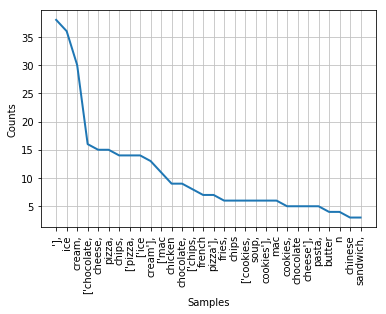

In [281]:
#Ploting common comfort foods that come to mind. 
import nltk
import re
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))
new = [i for i in str(comfort_food).lower().split() if i not in stop]
Freq_dist=nltk.FreqDist(new)
Freq_dist.plot(30, cumulative = False)

In [282]:
#Create a list of some of the reasons that make you eat comfort food
with open("/Users/ouyoshimisatoshi/Desktop/(7245)Bigdata Systems and Intelligence Analytics/Assignment1/Database/food_coded.csv",
          'rU') as csvfile:
    csvreader = csv.reader(csvfile)
    comfort_food_reason=[]
    for line in csvreader:
        comfort_food_reason.append([line[8]])
        print (line[8])

comfort_food_reasons
we dont have comfort 
Stress, bored, anger
stress, sadness
Boredom
Stress, boredom, cravings 
None, i don't eat comfort food. I just eat when i'm hungry.
stress, boredom
I eat comfort food when im stressed out from school(finals week), when I`m sad, or when i am dealing with personal family issues.
Boredom 
Stress, anger and sadness 
Boredom 
sadness, stress, cold weather
Sadness, boredom, late night snack 
stress,  boredom, special occasions
Friends, environment and boredom
boredom
Stress 
I usually only eat comfort food when I'm bored, if i am doing something, i can go for hours without eating 
Sadness, stress
boredom, sadness, hungry
happiness, satisfaction
Mostly boredom
sadness, depression 
Stress and boredom 
A long day, not feeling well, winter 
boredom
Boredom, lazyniss 
Boredom 
survival, bored
Boredom, anger, drunkeness
stress, boredom, cold weather
stres, boredom, and nighttime
Hunger and Boredom 
boredom, sadness, and if it has a good taste. 
boredom, s

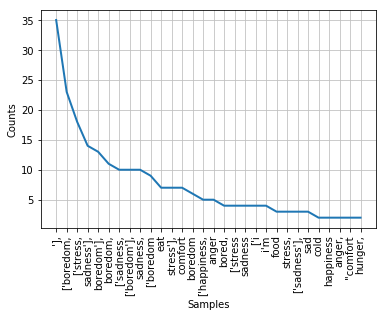

In [283]:
#Ploting common reasons for eating comfort food
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
new = [i for i in str(comfort_food_reason).lower().split() if i not in stop]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(30, cumulative = False)

<font size=4>**(2)Non-texture Features Data distribution** </font>

In [284]:
#Generates descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution
food.describe()

,GPA,calories_chicken,calories_day,calories_scone,ethnic_food,fruit_day,greek_food,healthy_feeling,indian_food,italian_food,life_rewarding,persian_food,thai_food,tortilla_calories,turkey_calories,veggies_day,waffle_calories,weight
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,3.415144,577.320000,3.024000,504.560000,3.744000,4.224000,3.488000,5.456000,3.152000,4.728000,5.104000,2.808000,3.336000,947.520000,555.040000,4.008000,1073.400000,158.952000
std,0.384145,131.214156,0.588382,230.034198,1.177093,0.923388,1.365567,2.585643,1.486802,0.587175,3.107805,1.418177,1.436528,201.274792,152.370379,1.081337,248.667092,31.988621
min,2.200000,265.000000,2.000000,315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,575.000000,100.000000
25%,3.200000,430.000000,3.000000,420.000000,3.000000,4.000000,3.000000,3.000000,2.000000,5.000000,2.000000,2.000000,2.000000,725.000000,500.000000,3.000000,900.000000,135.000000
50%,3.500000,610.000000,3.000000,420.000000,4.000000,5.000000,4.000000,5.000000,3.000000,5.000000,5.000000,3.000000,3.000000,940.000000,500.000000,4.000000,900.000000,155.000000
75%,3.700000,720.000000,3.000000,420.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,8.000000,4.000000,5.000000,1165.000000,690.000000,5.000000,1315.000000,180.000000
max,4.000000,720.000000,4.000000,980.000000,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,10.000000,5.000000,5.000000,1165.000000,850.000000,5.000000,1315.000000,265.000000


In [285]:
#Taking ethnic_food as an example to analyse the plot of column
#Count the number of different values‘ occurrence。
ethnic_food = food['ethnic_food'].value_counts()
print(ethnic_food)

5    42
4    36
3    25
2    17
1     5
Name: ethnic_food, dtype: int64


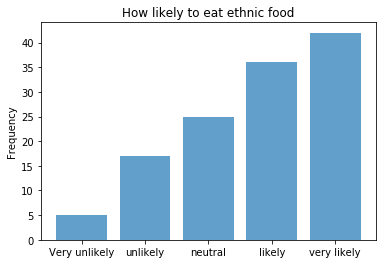

In [286]:
#Drawing histogram to show the result intuitively.
#From the histogram,we can see that most of the data is 
#distributed in"very like" and the smallest data is distributed 
#in "very unlike".
objects = ('Very unlikely', 'unlikely', 'neutral','likely','very likely')
y_pos = np.arange(len(objects))
performance = [5,17,25,36,42]
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('How likely to eat ethnic food')
 
plt.show()

In [287]:
sp_weight= food['self_perception_weight'].value_counts()
print(sp_weight)

just right           46
slight overweight    31
very fit             31
overweight            6
slim                  6
idont see             5
Name: self_perception_weight, dtype: int64


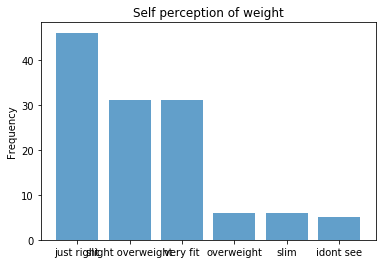

In [288]:
#Drawing histogram of self_perception_weight column.
#From the plot we can see that most of the data is 
#distributed in"just right","slight overweight"
#and "very fit",only a little people are overweight or slim.
objects = ('just right', 'slight overweight', 
           'very fit','overweight','slim','idont see')
y_pos = np.arange(len(objects))
performance = [46,31,31,6,6,5]
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Self perception of weight') 
plt.show()

<font size=4>**(3)Correlated columns analysis** </font>

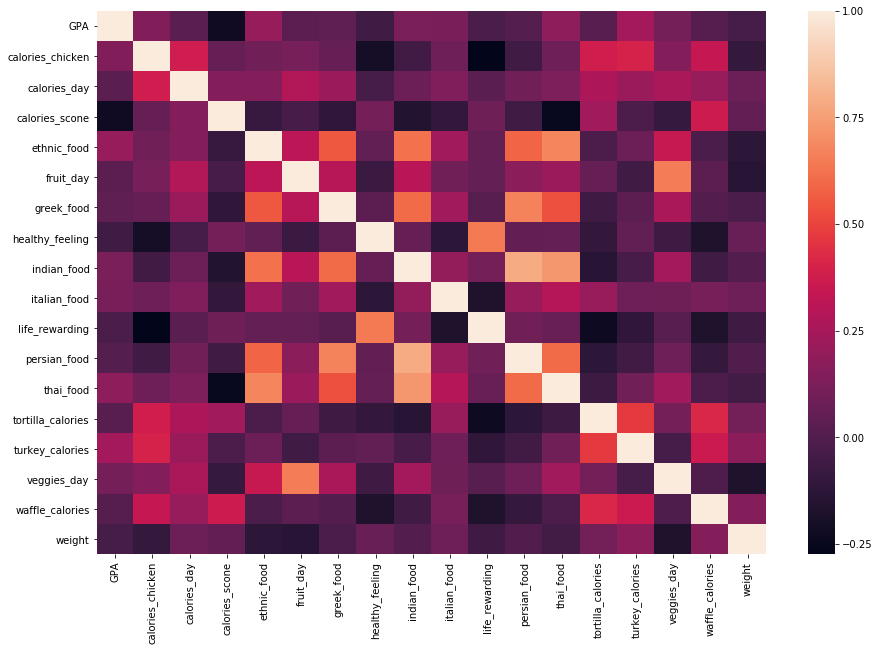

In [289]:
#Create the heatmap,a graphical representation of data using
#colors to indicate the level of activity,darker colors indicates 
#low correlation, and brighter colors indicates high correlation. 
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sn.heatmap(food.corr())

In [290]:
#Use .corr to get the the correlation between two columns
food.corr()

,GPA,calories_chicken,calories_day,calories_scone,ethnic_food,fruit_day,greek_food,healthy_feeling,indian_food,italian_food,life_rewarding,persian_food,thai_food,tortilla_calories,turkey_calories,veggies_day,waffle_calories,weight
GPA,1.000000,0.139441,0.026352,-0.223172,0.205202,0.034011,0.039774,-0.059930,0.127943,0.117910,-0.023081,0.006135,0.179167,0.024042,0.241921,0.106116,0.010162,-0.039091
calories_chicken,0.139441,1.000000,0.376363,0.062040,0.090029,0.112156,0.062942,-0.201979,-0.052667,0.085190,-0.274695,-0.057176,0.088459,0.381634,0.397642,0.152477,0.347542,-0.096904
calories_day,0.026352,0.376363,1.000000,0.151719,0.148673,0.286894,0.216158,-0.039057,0.078764,0.135761,0.025086,0.092549,0.133501,0.269831,0.214528,0.265877,0.208063,0.075473
calories_scone,-0.223172,0.062040,0.151719,1.000000,-0.090365,-0.034082,-0.111758,0.105488,-0.156724,-0.104185,0.081172,-0.059714,-0.247256,0.233237,-0.015800,-0.093520,0.365755,0.049424
ethnic_food,0.205202,0.090029,0.148673,-0.090365,1.000000,0.312872,0.554974,0.046614,0.621456,0.236816,0.058041,0.583855,0.680825,-0.018700,0.074923,0.350095,-0.020835,-0.123480
fruit_day,0.034011,0.112156,0.286894,-0.034082,0.312872,1.000000,0.302742,-0.076904,0.303949,0.098406,0.056452,0.168591,0.216388,0.061809,-0.056809,0.652402,0.031427,-0.138056
greek_food,0.039774,0.062942,0.216158,-0.111758,0.554974,0.302742,1.000000,0.030112,0.602667,0.237281,0.018349,0.669242,0.536506,-0.063046,0.032656,0.259482,-0.000769,-0.021798
healthy_feeling,-0.059930,-0.201979,-0.039057,0.105488,0.046614,-0.076904,0.030112,1.000000,0.061540,-0.124806,0.645380,0.050460,0.058292,-0.105274,0.048569,-0.061887,-0.172761,0.068421
indian_food,0.127943,-0.052667,0.078764,-0.156724,0.621456,0.303949,0.602667,0.061540,1.000000,0.195541,0.108251,0.786537,0.727283,-0.135764,-0.032243,0.245025,-0.056159,0.000324
italian_food,0.117910,0.085190,0.135761,-0.104185,0.236816,0.098406,0.237281,-0.124806,0.195541,1.000000,-0.174405,0.207947,0.290880,0.212605,0.088008,0.079663,0.112983,0.088176


**Observation**  

1.Ethnic_food is highly correlated with thai, persian, indian and greek foods.

2.Fruit_day is highly correlated with veggies_day.

3.Greek_food is highly correlated with persian, indian and thai foods.

4.Healthy_feeling is strongly related to life_rewarding.

5.Indian_food is related to thai and persian foods


<font size=4>**Visualizing correlated columns** </font>

From the following plots we can see a positive trend between the correlated columns.

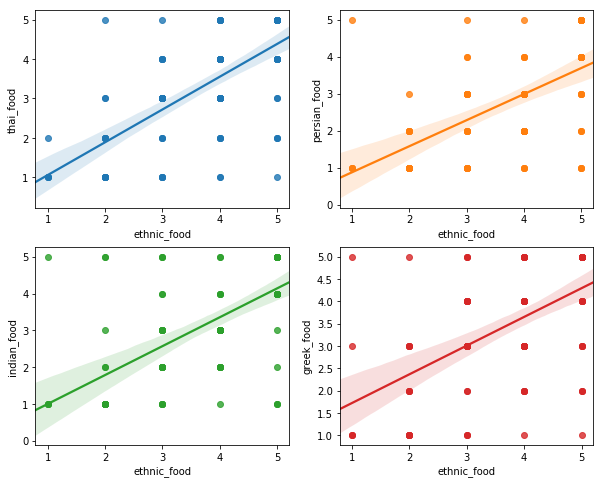

In [291]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 8)
ethnic_thai = sn.regplot('ethnic_food','thai_food',data = food, ax=axes[0,0])
ethnic_persian = sn.regplot('ethnic_food','persian_food',data = food, ax=axes[0,1])
ethnic_indian = sn.regplot('ethnic_food','indian_food',data = food, ax=axes[1,0])
ethnic_greek = sn.regplot('ethnic_food','greek_food',data = food, ax=axes[1,1])

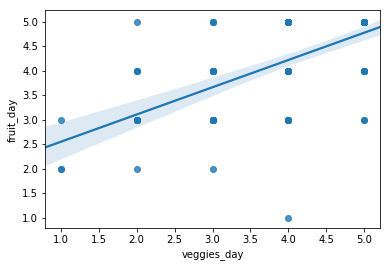

In [292]:
fruit_veggies = sn.regplot('veggies_day','fruit_day',data=food)

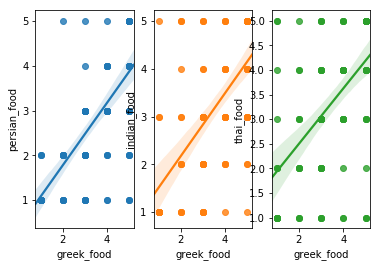

In [293]:
fig, axes = plt.subplots(nrows=1,ncols=3)
greek_peianr = sn.regplot('greek_food','persian_food',data = food, ax=axes[0])
greek_indian = sn.regplot('greek_food','indian_food',data = food, ax=axes[1])
greek_thai = sn.regplot('greek_food','thai_food',data = food, ax=axes[2])

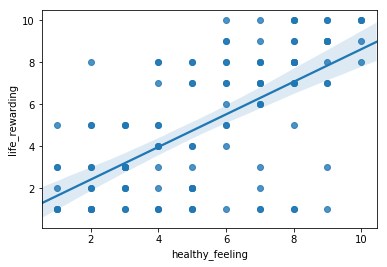

In [294]:
health_life = sn.regplot('healthy_feeling','life_rewarding',data = food)

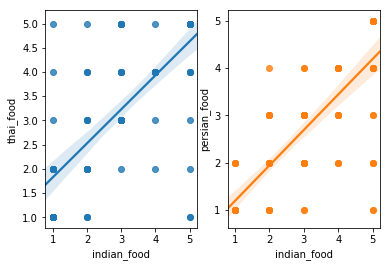

In [295]:
fig, axes = plt.subplots(nrows=1,ncols=2)
indian_thai = sn.regplot('indian_food','thai_food',data = food, ax=axes[0])
indian_persian = sn.regplot('indian_food','persian_food',data = food, ax=axes[1])

<font size=4>**(5)SVM** </font>

After comparing the prediction result of different models,I choose 
to apply SVM algorithn.

In [296]:
#Dividing the GPA into 2 levels,classifying the GPA less than 
#or equal to 3.5 as the second level.Classifying 
#the GPA higher than 3.5 as the first level. Using 1, 2 to
#reperesent these two levels.
food['GPA'][food['GPA']<=3.5]=2

/Users/ouyoshimisatoshi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [297]:
food['GPA'][food['GPA']>3.5]=1

/Users/ouyoshimisatoshi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [298]:
food['GPA']= food['GPA'].astype('int');

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
#Specifying extreme features which is just every numeric variable 
#for the x axis.
#Spliting the data into training data and testing data,set 70% of the original data as 
#the training data and the remainig as the testing data.
X = food[['calories_chicken', 'calories_day','calories_scone',
              'ethnic_food','fruit_day','greek_food','healthy_feeling',
              'indian_food','italian_food','life_rewarding',
              'persian_food','thai_food','tortilla_calories',
              'turkey_calories','veggies_day','waffle_calories']]
y = food['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Train a model**

In [301]:
#call the SVC() model from sklearn and fit the model to
#the trainin data.
from sklearn.svm import SVC

In [302]:
svc_model = SVC()

In [303]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Model Evaluation**

In [304]:
#Getting predictions from the model
predictions = svc_model.predict(X_test)

In [305]:
#Creating a confusion matrix.Comparing y-test to prediction
from sklearn.metrics import classification_report,confusion_matrix

In [306]:
print(confusion_matrix(y_test,predictions))

[[ 2 14]
 [ 0 22]]


In [307]:
#The precision is 0.77
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       1.00      0.12      0.22        16
          2       0.61      1.00      0.76        22

avg / total       0.77      0.63      0.53        38



Result

(1)	Text features data distribution part
In this part I used natural language processing technology to analyze the occurrence frequency of each word of different open-ended questions. The cumulative frequency plot shows the 30 most frequently appeared words. For the column which ask to create a list of all the comfort food that come to mind, the plot shows that the words that appear most frequently from high to low are ice-cream, chocolate, cheese, pizza, chicken, chips, cookies, pasta, and butter. Among them, the frequency of ice-cream and chocolate are far greater than anything else. For the question what are the common reasons for eating comfort food, the most frequent words are boredom, stress, sadness, happiness and hunger. 

(2)	Correlated columns analysis part
From the heat map, we have the following observations:
1.Ethnic_food column is highly correlated with Thai, Persian, Indian and Greek foods columns;
2.Fruit_day column is highly correlated with veggies_day column;
3.Greek_food column is highly correlated with Thai, Persian and Indian foods columns;
4.Healthy_feeling column is strong related to life_rewarding column;
5.Indian_food column is related to Thai and Persian foods columns.
I analyzed their relationship further by visualizing correlated columns. The regpolt shows a positive trend between the correlated columns.

(3)	SVM model part
Based on these labeled data, I tried to use SVM model to classify the GPA level. Then I got predictions from the model and created a confusion matrix and a classification report. The classification report shows that the total precision is 0.77. 
Discussion

Discussion

(1)	For text features data distribution part, the results can tell us that students often have poor eating choices. These foods are high in calories and sugar, which could contribute to serious weight problems. And the poor eating preference is mostly associated with bod mood. This phenomenon reflects students' lack of deep nutritional knowledge. Society and colleges should give students more guidance on the nutritional value of food to further promote healthy eating habits. 

(2)	For correlated columns analysis part, although heat map is pretty straightforward to show the correlations among different columns, I tried to further explore the relationships under different conditions. For example, I ran an independent t-test for gender and veggies day. I divided the test into two groups based on gender, then I tried to figure out if women are more or less likely to eat veggies than males, but the p value is higher than 0.05 so there is no obvious statistical difference between men and women and their likely to eat veggies. I've done a lot of attempts like this, but the data in this database cannot reflect any distinct statistical relationship like this.

(3)	For SVM model part, I tried to use grid search to improve the precision by adjusting the value of parameters (such as C and gamma values). The thought behind this method is just trying out all the possible combinations of C and gamma values. GridSearchCV is a meta-estimator. It runs the same loop with cross validation firstly to find the best parameter combination. Once it gets the best combination, it runs again to fit on all data passed. Unfortunately, because the dataset is not large enough, I am not satisfied enough with the result and I removed this part of job. 
